In [814]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [815]:
img1 = cv.imread('Right6.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('Right2.png', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('Left1.jpg', cv.IMREAD_GRAYSCALE)
img4 = cv.imread('Right3.png', cv.IMREAD_GRAYSCALE)
img5 = cv.imread('Right4.png', cv.IMREAD_GRAYSCALE)
img6 = cv.imread('Left2.png', cv.IMREAD_GRAYSCALE)
img7 = cv.imread('Right5.png', cv.IMREAD_GRAYSCALE)
img8 = cv.imread('Right7.png', cv.IMREAD_GRAYSCALE)


In [816]:
images = [img1, img2, img3, img4, img5, img6, img7, img8]
for i in range(8):
    images[i] = cv.resize(images[i], (600, 400), interpolation=cv.INTER_AREA)

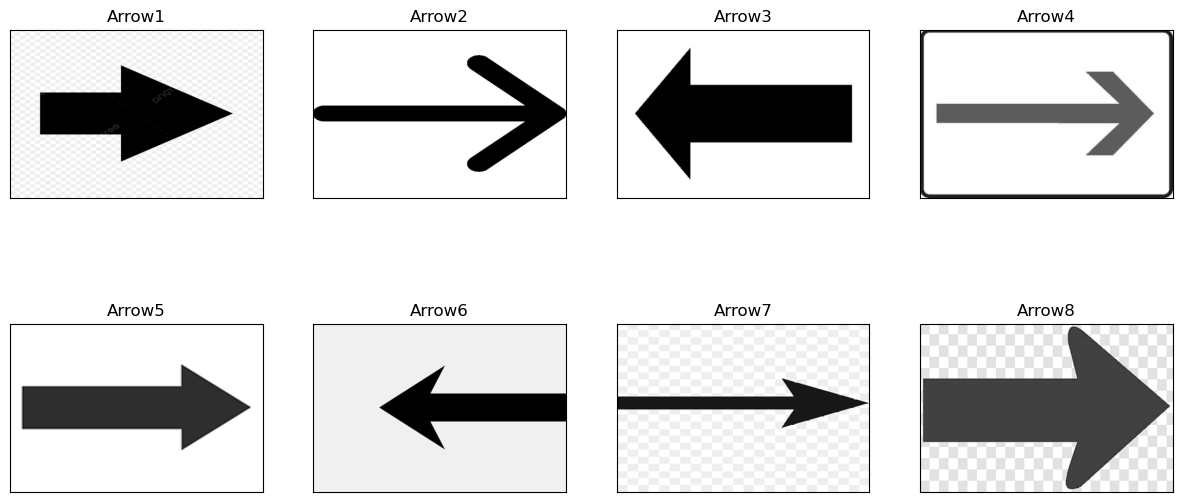

In [817]:
titles = ['Arrow1','Arrow2','Arrow3','Arrow4','Arrow5','Arrow6','Arrow7','Arrow8']
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharey=False)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [818]:

threshes = [img1, img2, img3, img4, img5, img6, img7, img8]
mask = [img1, img2, img3, img4, img5, img6, img7, img8]
pri = [img1, img2, img3, img4, img5, img6, img7, img8]
cnt = [0, 0, 0, 0, 0, 0, 0, 0]
x_range = [0, 0, 0, 0, 0, 0, 0, 0]
x_range2 = [0, 0, 0, 0, 0, 0, 0, 0]
y_range = [0, 0, 0, 0, 0, 0, 0, 0]
y_range2 = [0, 0, 0, 0, 0, 0, 0, 0]
x_start = [0, 0, 0, 0, 0, 0, 0, 0]
y_start = [0, 0, 0, 0, 0, 0, 0, 0]
x_end = [0, 0, 0, 0, 0, 0, 0, 0]
y_end = [0, 0, 0, 0, 0, 0, 0, 0]


In [819]:
for i in range(8):
    threshold = 170
    ret,threshes[i] = cv.threshold(images[i], 170,255,cv.THRESH_BINARY_INV)
    contours,hierarchy = cv.findContours(threshes[i], 1, 2)
    while(len(contours) == 0 or cv.contourArea(contours[0]) < 1000):
        threshold += 50
        ret,threshes[i] = cv.threshold(images[i], threshold,255,cv.THRESH_BINARY_INV)
        contours,hierarchy = cv.findContours(threshes[i], 1, 2)
    cnt[i] = contours[0]



In [820]:

for i in range(8):
    x,y,w,h = cv.boundingRect(cnt[i])
    for j in range(x, x+w):
        if(threshes[i][y+1][j] == 255):
            x_range[i] = j
            break
    for j in range(y, y+h):
        if(threshes[i][j][x+1] == 255):
            y_range[i] = j
            break
    for j in range(y, y+h):
        if(threshes[i][j][x+w-1] == 255):
            y_range2[i] = j
            break    
    for j in range(x+w, x):
        if(threshes[i][y+1][j] == 255):
            x_range2[i] = j
            break 
    x_start[i] = x
    x_end[i] = x+w
    y_start[i] = y
    y_end[i] = y+h
    pri[i] = threshes[i].copy()
    cv.rectangle(pri[i],(x,y),(x+w,y+h),255,4)

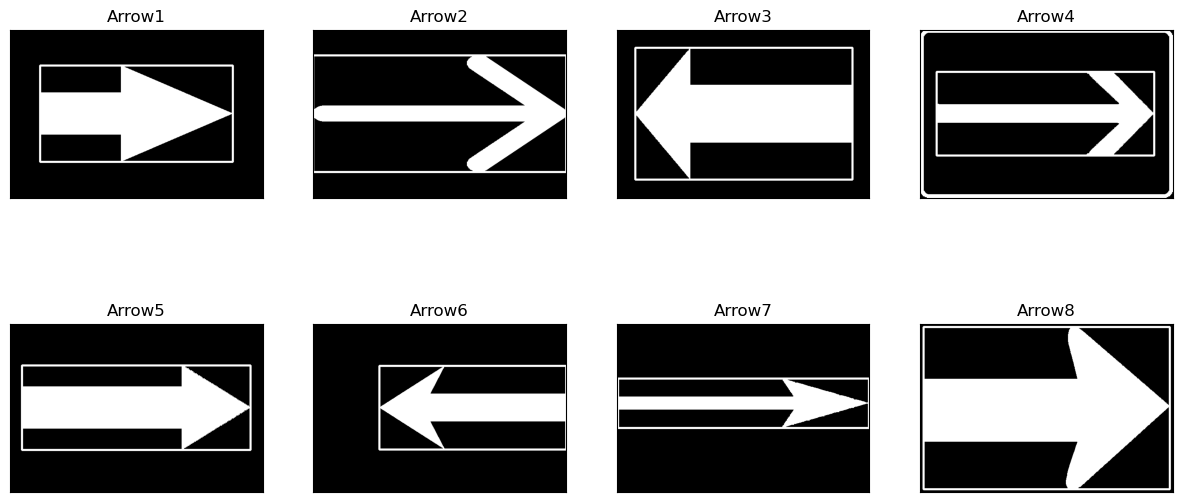

In [821]:
titles = ['Arrow1','Arrow2','Arrow3','Arrow4','Arrow5','Arrow6','Arrow7','Arrow8']
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharey=False)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(pri[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [822]:
for i in range(8):
    mask[i] = np.zeros(images[i].shape, np.uint8)
    cv.line(mask[i],(x_start[i],y_range[i]),(x_range[i],y_start[i]),255,15)


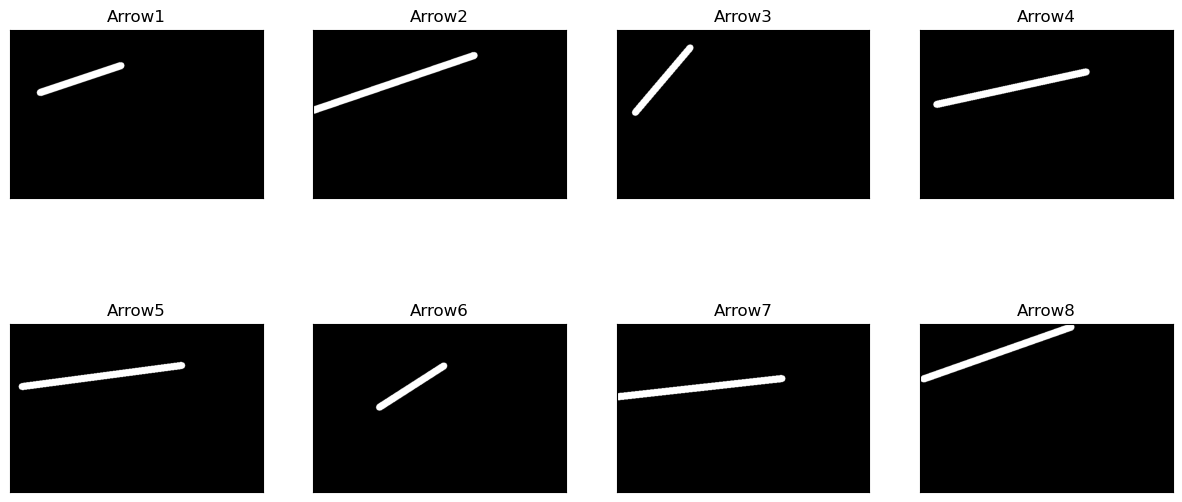

In [823]:
titles = ['Arrow1','Arrow2','Arrow3','Arrow4','Arrow5','Arrow6','Arrow7','Arrow8']
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharey=False)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(mask[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [824]:
for i in range(8):
    mask[i] = cv.bitwise_and(threshes[i],mask[i])

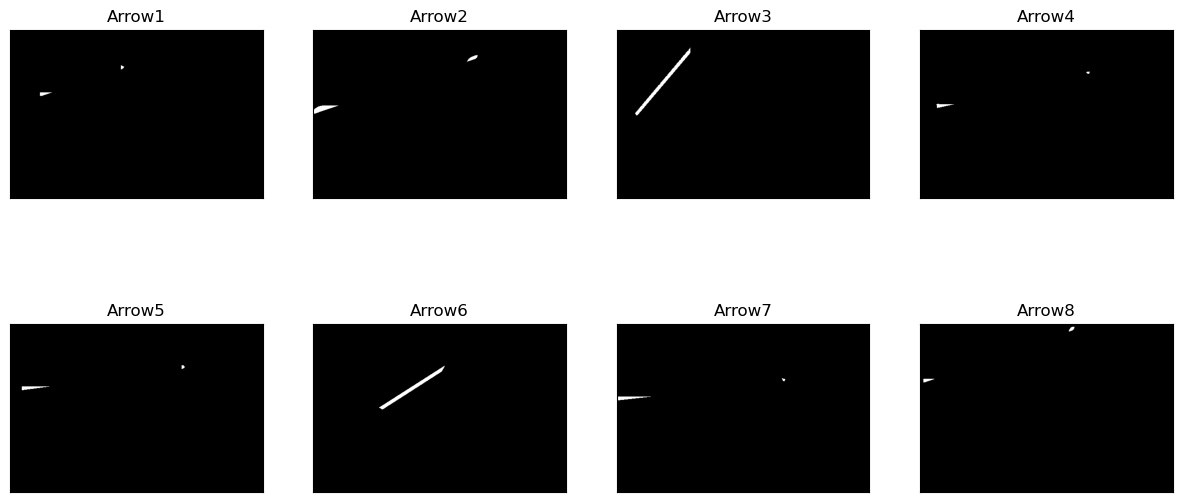

In [825]:
titles = ['Arrow1','Arrow2','Arrow3','Arrow4','Arrow5','Arrow6','Arrow7','Arrow8']
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharey=False)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(mask[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [826]:
for i in range(8):
    ret,mask[i] = cv.threshold(mask[i], 127,255,cv.THRESH_BINARY_INV)
    contours,hierarchy = cv.findContours(mask[i], 1, 2)
    if(len(contours) != 0 and cv.contourArea(contours[0]) > 700):
        cv.putText(pri[i], 'Left Arrow', (30,30), cv.FONT_HERSHEY_SIMPLEX, 1, 255, 2, cv.LINE_AA)


    

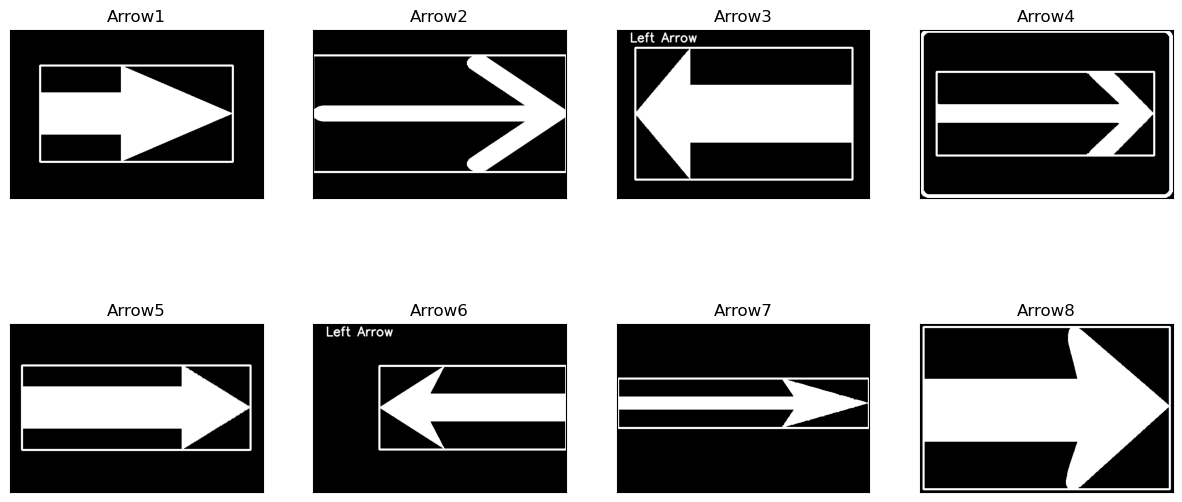

In [827]:
titles = ['Arrow1','Arrow2','Arrow3','Arrow4','Arrow5','Arrow6','Arrow7','Arrow8']
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharey=False)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(pri[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [828]:
for i in range(8):
    mask[i] = np.zeros(images[i].shape, np.uint8)
    cv.line(mask[i],(x_end[i],y_range2[i]),(x_range[i],y_start[i]),255,15)

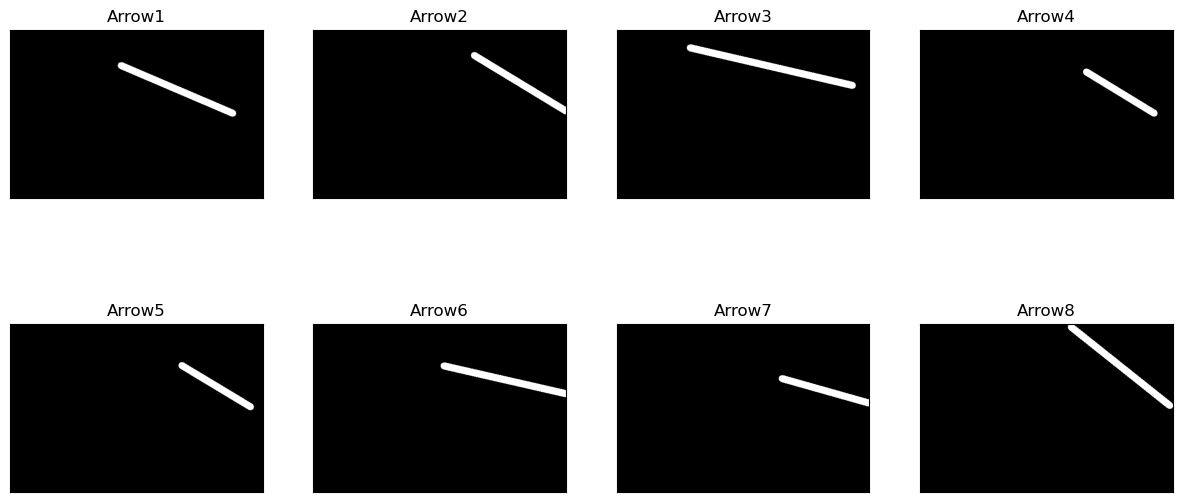

In [829]:
titles = ['Arrow1','Arrow2','Arrow3','Arrow4','Arrow5','Arrow6','Arrow7','Arrow8']
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharey=False)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(mask[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [830]:
for i in range(8):
    mask[i] = cv.bitwise_and(threshes[i],mask[i])

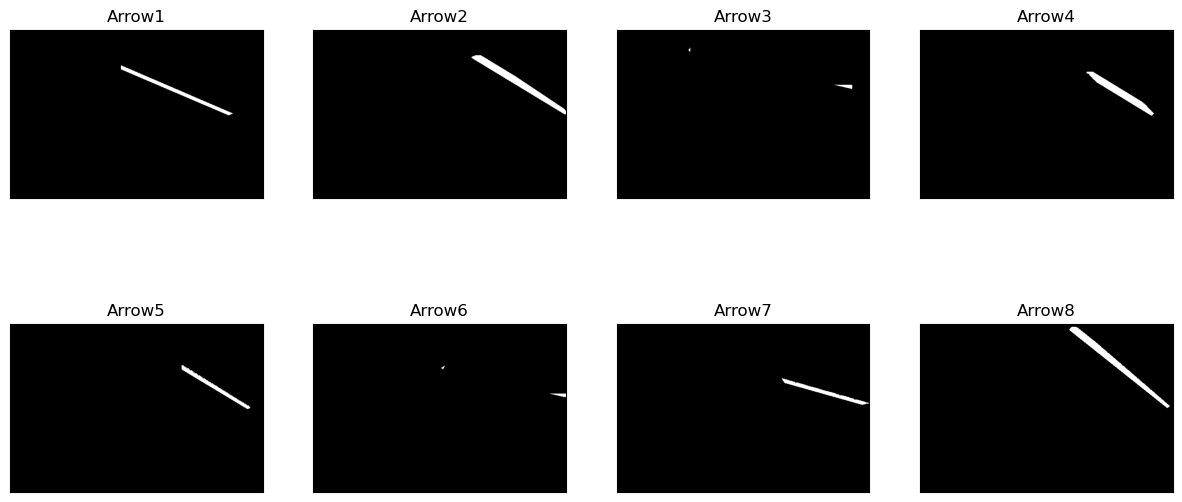

In [831]:
titles = ['Arrow1','Arrow2','Arrow3','Arrow4','Arrow5','Arrow6','Arrow7','Arrow8']
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharey=False)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(mask[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [832]:
for i in range(8):
    ret,mask[i] = cv.threshold(mask[i], 127,255,cv.THRESH_BINARY_INV)
    contours,hierarchy = cv.findContours(mask[i], 1, 2)
    if(len(contours) != 0 and cv.contourArea(contours[0]) > 700):
        cv.putText(pri[i], 'Right Arrow', (30,30), cv.FONT_HERSHEY_SIMPLEX, 1, 255, 2, cv.LINE_AA)

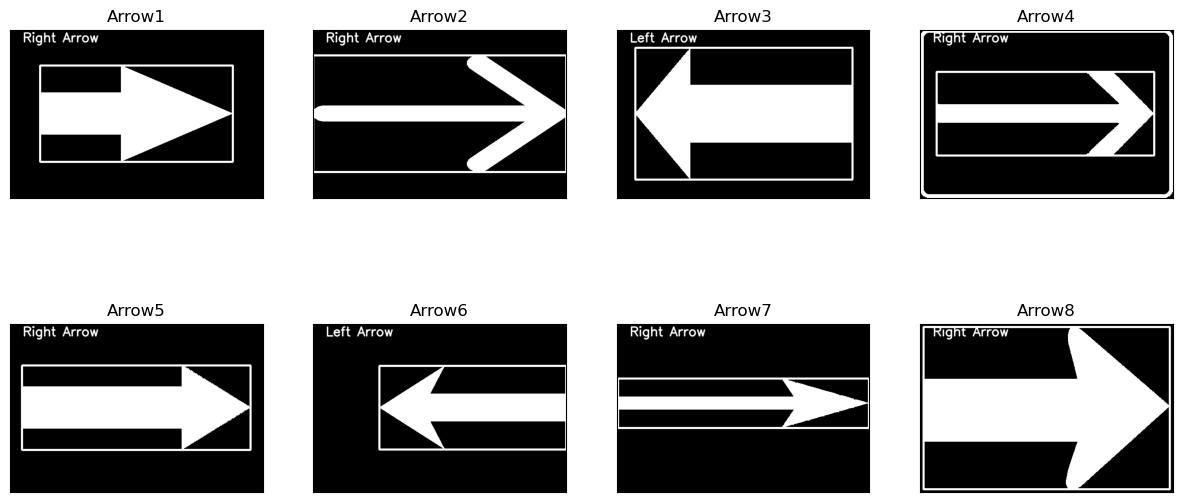

In [833]:
titles = ['Arrow1','Arrow2','Arrow3','Arrow4','Arrow5','Arrow6','Arrow7','Arrow8']
fig, axs = plt.subplots(2, 4, figsize=(15, 7), sharey=False)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(pri[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()